## Proyecto: Superstore
---
### Tabla de Contenido

 **i)** Abstracto

 **ii)** Planteo del problema a resolver


 **iii)** Análisis Exploratorio de Datos (EDA)

 **iv)** Ingeniería de Atributos

 **v)** Entrenamiento y Testeo

 **vi)** Optimización

 **vii)** Selección de Modelos

---

### **i) _Abstracto_**


Este trabajo propone una forma de mejorar la experiencia de los usuarios en los sitios de ventas de productos online mediante el uso de la inteligencia artificial. El objetivo es anticiparse a las necesidades y preferencias de los perfiles de los clientes, y ofrecerles productos que les interesen y que no saben que están buscando. Para ello, se utiliza un modelo que puede predecir cuándo, qué y dónde comprarán los usuarios, basándose en sus gustos y hábitos de compra. De esta manera, se busca crear una conversación implícita entre el sitio y el cliente, que beneficie a ambas partes.


---



### **ii.a) _Objetivo_**

SuperSales es un sitio de ventas online local que tiene amplia distribución a nivel global.
Para poder diseñar un plan de expansión necesita comprender el desarrollo logrado en los primeros cuatro años de vida, entendiendo los comportamientos y tendencias a partir de medidas agrupadas por región geográfica y tipo de producto logrando:

1) Entender si el crecimiento fue generalizado o si alguna región se destacó más que otras a fin de evaluar la posibilidad de mejorar canales de distribución y centros de logística

2) Ver si hay algún producto o línea de productos que se destaquen por sobre el resto a fin de conseguir optimizar el manejo de stock

3) Entender el impacto de los descuentos ofrecidos sobre el total de ganancias obtenidas a fin de diagramar una política de ofertas que seduzca a los clientes y maximice las ganancias


---



### **ii.b) _Contexto Analítico_**

El dataset elegido contiene información de órdenes de compra, durante cuatro años (2011- 2014), de una gran tienda con distribución internacional.

En el mismo se pueden identificar grupos de columnas con la siguiente información:

•	**Order details:** Listado de las órdenes de compras realizadas

•	**Customers:** Datos personales de los clientes

•	**Segment:** Segmento comercial al que pertenece el cliente

•	**Country region:** Región comercial a la que pertenece un país

•	**Market region:** Mercado al que pertenece cada región comercial

•	**Products:** Índice de productos comercializados

•	**Ship mode:** Modos de envío

•	**Priority:** Prioridad en los envíos

Comprendiendo el desarrollo logrado en este período se podrán proyectar  acciones que favorezcan un crecimiento orgánico del sitio.
Para ello, se hará foco en:

*   **El volumen de ventas**
*   **El margen de ganancias**
*   **Las políticas de descuento aplicadas**

En un primer nivel de análisis se tomarán los datos agrupados por región geográfica y tipo de producto, fácilmente comparable entre diferentes categorías para cumplir los 3 puntos detallados en Objetivos.

Se utilizarán las siguientes librerías:
*   Pandas
*   Numpy
*   Matplotlib
*   Pyplot
*   Seaborn
*   Drive


En un segundo nivel, se analizará el comportamiento de las "tendencias" para "predecir" algún "sendero" de ventas, descuentos y márgenes de ganancias utilizando modelos de predicción de ML.

Este nivel de análisis permitirá dimensionar la capacidad de expansión del sitio de ventas y canalizar los esfuerzos, de ser económicamente viable, a mejorar la logística y la experiencia del usuario.


### **iii) Análisis Exploratorio de Datos (EDA)**

In [ ]:
# Instalación de librerías

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
from google.colab import drive

# Uso de los archivos en una carpeta de Google Drive

drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/CODERHOUSE/DATA SCIENCE'


Mounted at /content/gdrive
/content/gdrive/MyDrive/CODERHOUSE/DATA SCIENCE


In [ ]:
 # lectura de la información y almacenamiento en DataFrame1

%cd '/content/gdrive/MyDrive/CODERHOUSE/DATA SCIENCE'

df1 = pd.read_excel('superstore_dataset2011-2015.xlsx')
df1.head()

/content/gdrive/MyDrive/CODERHOUSE/DATA SCIENCE


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2.0,0.0,106.14,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120366.00,3.0,0.1,36036.00,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4.0,0.0,29.64,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44865.00,3.0,0.5,-26055.00,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5.0,0.1,37.77,4.70,Medium


In [ ]:
# Estructura del DataFrame1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
df1.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,5.128400e+04,51284.000000,51284.000000,5.128400e+04,51284.000000
mean,25645.50000,55190.379428,6.103689e+05,3.476328,0.142905,8.712077e+04,26.374072
std,14806.29199,32063.693350,5.464241e+06,2.278720,0.212291,1.814405e+06,57.299646
min,1.00000,1040.000000,4.440000e-01,1.000000,0.000000,-9.167178e+07,0.000000
25%,12823.25000,23223.000000,5.200000e+01,2.000000,0.000000,0.000000e+00,2.610000
50%,25645.50000,56430.500000,2.371350e+02,3.000000,0.000000,1.734000e+01,7.790000
75%,38467.75000,90008.000000,2.713725e+04,5.000000,0.200000,4.438500e+02,24.442500
max,51290.00000,99301.000000,1.902108e+08,14.000000,0.850000,8.728282e+07,933.570000


In [ ]:
# Análisis de valores nulos
df1.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 6
Quantity              6
Discount              6
Profit                6
Shipping Cost         6
Order Priority        6
dtype: int64

In [ ]:
Porc_N_Postal_Code = 41296/51284*100
Porc_N_Variables = 6/51284*100

print("Porcentaje de Códigos Postales nulos: " + "%.2f%%" % Porc_N_Postal_Code)
print("Porcentaje de Cantidad de Ventas nulas: " + "%.2f%%" % Porc_N_Variables)
print("Porcentaje de Montos de Descuentos nulos: " + "%.2f%%" % Porc_N_Variables)
print("Porcentaje de Montos de Ganancias nulas: " + "%.2f%%" % Porc_N_Variables)
print("Porcentaje de Montos de Costos de Envío nulos: " + "%.2f%%" % Porc_N_Variables)
print("Porcentaje de Prioridad de órdenes nulas: " + "%.2f%%" % Porc_N_Variables)

Porcentaje de Códigos Postales nulos: 80.52%
Porcentaje de Cantidad de Ventas nulas: 0.01%
Porcentaje de Montos de Descuentos nulos: 0.01%
Porcentaje de Montos de Ganancias nulas: 0.01%
Porcentaje de Montos de Costos de Envío nulos: 0.01%
Porcentaje de Prioridad de órdenes nulas: 0.01%


<ipython-input-12-daf3b77ef2f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df1['Sales'])
<ipython-input-12-daf3b77ef2f3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df1['Quantity'])
<ipython-input-12-daf3b77ef2f3>:8: UserWarning: 

`distplot` is a deprecated function and wil

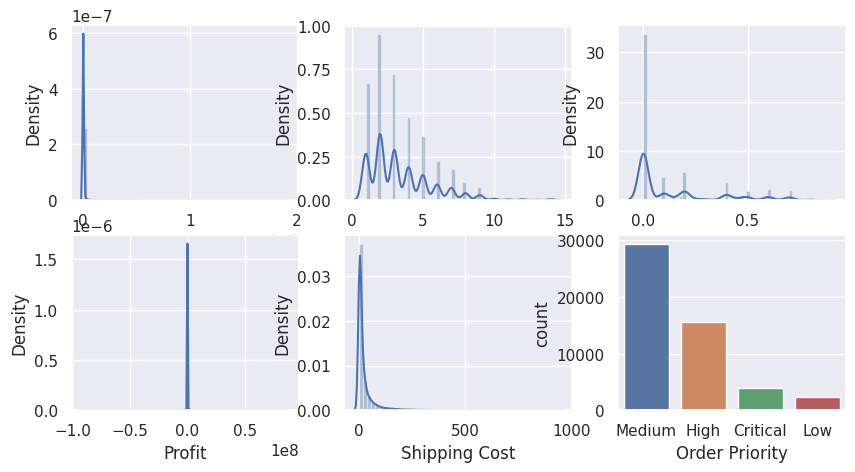

In [ ]:
sns.set(rc={"figure.figsize": (10, 5)})

subplot(2,3,1)
ax = sns.distplot(df1['Sales'])
subplot(2,3,2)
ax = sns.distplot(df1['Quantity'])
subplot(2,3,3)
ax = sns.distplot(df1['Discount'])
subplot(2,3,4)
ax = sns.distplot(df1['Profit'])
subplot(2,3,5)
ax = sns.distplot(df1['Shipping Cost'])
subplot(2,3,6)
ax= sns.countplot(x='Order Priority', data=df1)

Debido a que el Código Postal es prescindible, ya que se encuentra el nombre de la Ciudad en los campos del Dataset, se decide omitir.

El costo de envío será asumido como "Medium" para los 6 casos faltantes por ser el valor modal.

Los demás campos en blanco serán completados con la mediana, debido a la forma de su función de densidad.


In [ ]:
df1.drop(columns=['Postal Code'], inplace=True)

KeyError: ignored

In [ ]:
df1['Order Priority'].fillna('Medium', inplace = True)

In [ ]:
df1.fillna(df1['Sales'].median(), inplace = True)
df1.fillna(df1['Quantity'].median(), inplace = True)
df1.fillna(df1['Discount'].median(), inplace = True)
df1.fillna(df1['Profit'].median(), inplace = True)
df1.fillna(df1['Shipping Cost'].median(), inplace = True)


In [ ]:
# Verificamos el reemplazo de valores nulos
df1.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

**iii) _Análisis Exploratorio de Datos_**

In [ ]:
# Creo 3 Data Frames que m ayuden a ver el comportamiento de las ventas

Ventas = df1[['Order Date', 'Market','Sales']].sort_values(by=['Order Date']) # Dataset con las órdenes de compra por marcado
Ventas_Diarias = Ventas.groupby(['Market','Order Date']).sum().groupby(level=[0]).cumsum() # Dataset con las ventas diarias por mercado
Ventas_Acumuladas = Ventas_Diarias.cumsum(axis = 0) # Dataset con las ventas acumuladas por mercado

<Axes: xlabel='Order Date', ylabel='Sales'>

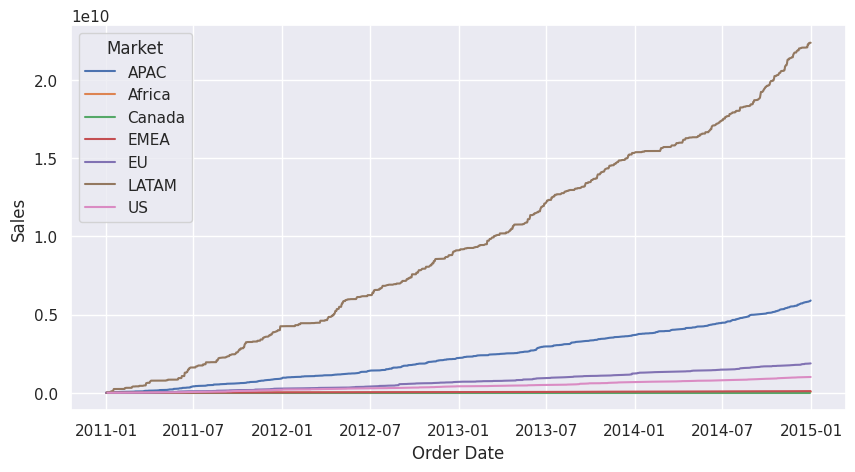

In [ ]:
sns.lineplot(data=Ventas_Diarias, x='Order Date', y='Sales', hue='Market')

El gráfico parece indicar un comportamiento uniforme en cada mercado de las ventas diarias registradas.

<Axes: xlabel='Order Date', ylabel='Sales'>

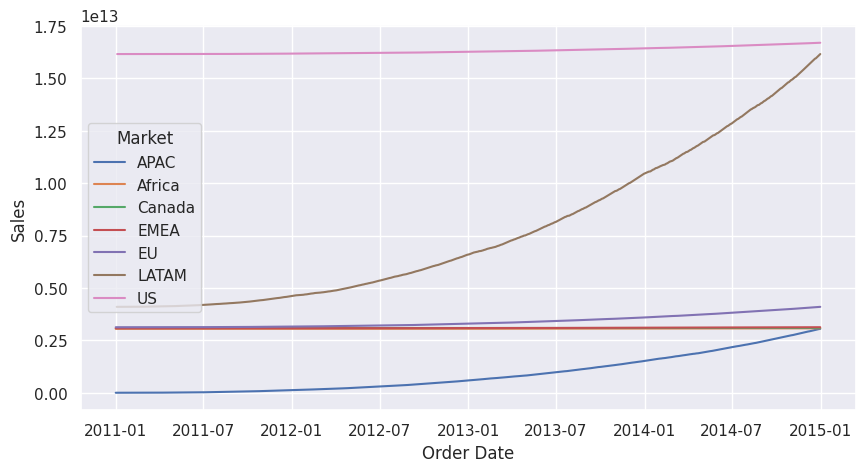

In [ ]:
sns.lineplot(data=Ventas_Acumuladas, x='Order Date', y='Sales', hue='Market')

El gráfico confirma que la participación de LATAM es la más significativa junto con la de APAC a partir de 2012, mientras que el resto de los mercados parecen mantenerse constantes a lo largo del período.

Otros resultados que arrojó el análisis estadístico descriptivo de las variables categóricas a continuación.

**Análisis de cantidad de transacciones**

Las transacciones (medidas como cuenta de registros, ya que se corresponden con las órdenes de compras) por grandes categorías de productos comercializados, sugieren que **Office Suplies** es la categoría que más transacciones realiza y, dentro de ella, el TOP 3 de Subcategorías lo llevan: _Blinders_, _Storage_ y _Art_ con el 51,5% del total.

**Análisis de Montos de Ventas**

Podemos ver que las cuatro sub-categorías que más facturan son _Appliances_, _Storage_, _Blinders_ y _Art_ comprobando que las tres que más transacciones realizan, también se encuentran entre las que más facturan.

**Análisis del margen de ganancia reportado**

Podemos ver que las cuatro sub-categorías que más ganancia reportan son _Appliances, Storage, Blinders_ y _Paper_ viendo que las tres que más transacciones realizan se encuentran entre las que más ganancias reportan.

**Análisis de segmento de cliente**

Se puede ver que los **Consumidors finales** son quienes más órdenes realizan, seguidos por las compras empresariales y, por último los insumos destinados a *Home Office*.

**Análisis de Mercados**

Creamos un SubSet considerando solo las variables "económicas" de la operación para ver la participación de cada mercado en las transacciones.

In [ ]:
dfa=df1[['Market', 'Segment','Category','Sub-Category','Ship Mode','Order Priority','Profit','Sales','Quantity','Discount','Shipping Cost']]
dfa

,Market,Segment,Category,Sub-Category,Ship Mode,Order Priority,Profit,Sales,Quantity,Discount,Shipping Cost
0,Africa,Consumer,Office Supplies,Storage,Standard Class,Medium,106.1400,408.30,2.0,0.0,35.46
1,APAC,Consumer,Office Supplies,Supplies,Standard Class,Medium,36036.0000,120366.00,3.0,0.1,9.72
2,EMEA,Consumer,Office Supplies,Storage,Second Class,High,29.6400,66.12,4.0,0.0,8.17
3,EU,Home Office,Office Supplies,Paper,Second Class,High,-26055.0000,44865.00,3.0,0.5,4.82
4,APAC,Consumer,Furniture,Furnishings,Standard Class,Medium,37.7700,113.67,5.0,0.1,4.70
...,...,...,...,...,...,...,...,...,...,...,...
51285,US,Corporate,Office Supplies,Binders,Standard Class,Medium,45188.0000,13904.00,2.0,0.2,0.89
51286,Africa,Consumer,Office Supplies,Binders,Standard Class,Medium,0.4200,3.99,1.0,0.0,0.49
51287,LATAM,Consumer,Office Supplies,Labels,Second Class,Medium,12.3600,26.40,3.0,0.0,0.35
51288,LATAM,Consumer,Office Supplies,Labels,Standard Class,Medium,0.5600,7.12,1.0,0.0,0.20


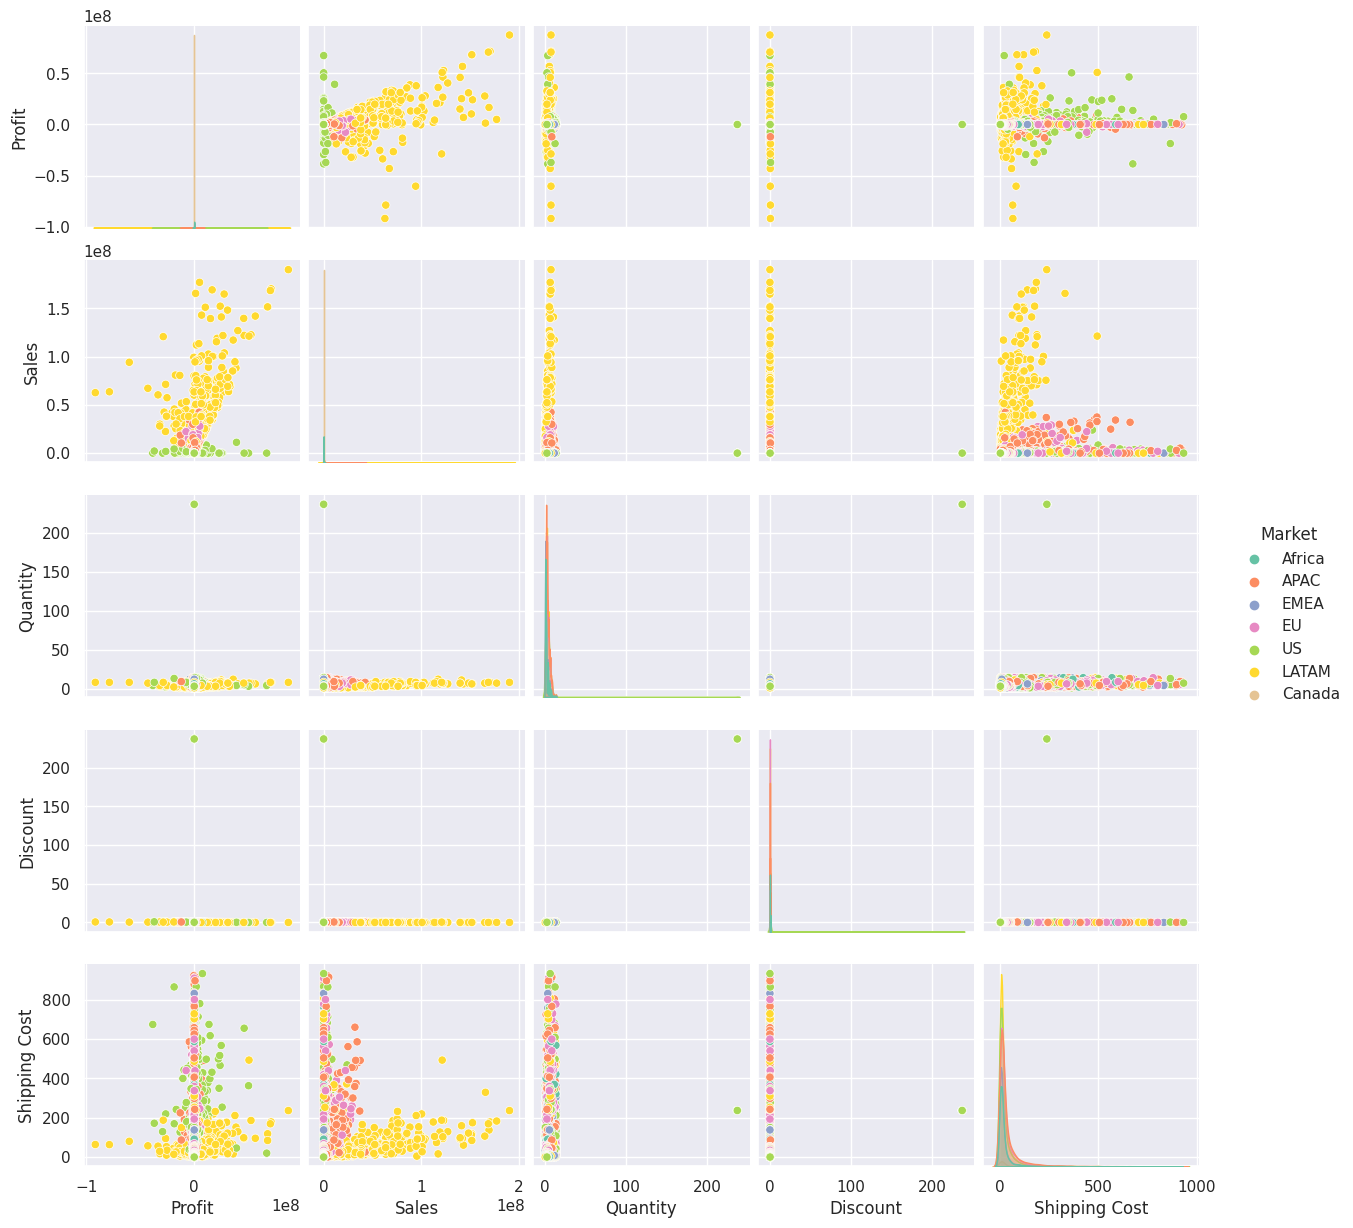

In [ ]:
#Pairplot
sns.pairplot(dfa,hue = 'Market'  , palette = 'Set2')

Agrupando por mercados vemos que:

a) Los mercados que aportan mayor cantidad de transacciones coinciden con los que más facturan. El mercado que más volumen de ventas maneja es **APAC**, seguido por **LATAM** y **US**.

b) Se puede inferir que, en promedio, ventas más altas reportan beneficios más altos: **LATAM** presenta los mayores beneficios pero también, las mayores pérdidas.
**US** presenta pocas ventas pero de altos rendimientos, aunque también se observan pérdidas de hasta 0,45 (aprox). **APAC** y **UE** reportan beneficios casi nulos (por encontrarse los puntos cerca del 0 de Profit)

c) Se ve que, mayormente en todos los mercados, las ventas de mayores montos no recurren al uso de descuentos, excepto para **LATAM** que los aplica en todos sus niveles.

**Hipótesis:**

La Ganancia (Profit) de cada operación es función de los componentes propios de la venta, ya que cada mercado (Market) sigue un comportamiento estable en el tiempo.


### **iv) Ingeniería de Atributos**

A las variables categoricas les asignamos un valor numérico a fin de poder aplicar los modelos de ML.
Para esta parte usaremos librerías de sklearn.

In [ ]:
from sklearn import preprocessing
from sklearn import datasets

In [ ]:
def df_unique_val_col(df, col_list = [] ):

    #Cuento la máxima cantidad de valores unicos que tienen los campos
    cant_table_col = 0
    for i in col_list:
        l = len(df[i].unique())
        if cant_table_col < l:
            cant_table_col = l

    # Creo la lista de campos "value_x" para armar el indice y definir el tamaño de la tabla (alto)
    A = []
    for i in range(cant_table_col):
        A.append('Value : '+str(i))

    #creo un dataframe vacio
    dg = pd.DataFrame(index = A,
                          columns = df[col_list].columns)

    #Completo el dataframe con los valores unicos sino lo lleno con '-'
    for m in df[col_list]:
        uni = df[m].unique()
        le = len(uni)

        for j in range(cant_table_col):
            if j < le:
                dg[m][j] = uni[j]
            else:
                dg[m][j] = '-'

    print('Valores únicos de algunos campos de interes')
    return dg

In [ ]:
Var_Categoricas = ['Market','Segment','Category','Sub-Category','Ship Mode','Order Priority']
df_unique_val_col(dfa,Var_Categoricas)

Valores únicos de algunos campos de interes


,Market,Segment,Category,Sub-Category,Ship Mode,Order Priority
Value : 0,Africa,Consumer,Office Supplies,Storage,Standard Class,Medium
Value : 1,APAC,Home Office,Furniture,Supplies,Second Class,High
Value : 2,EMEA,Corporate,Technology,Paper,First Class,Critical
Value : 3,EU,-,-,Furnishings,Same Day,Low
Value : 4,US,-,-,Copiers,-,-
Value : 5,LATAM,-,-,Bookcases,-,-
Value : 6,Canada,-,-,Appliances,-,-
Value : 7,-,-,-,Art,-,-
Value : 8,-,-,-,Accessories,-,-
Value : 9,-,-,-,Binders,-,-


In [ ]:
le = preprocessing.LabelEncoder()
dfa['Market']=le.fit_transform(dfa['Market'])
dfa['Order Priority']=le.fit_transform(dfa['Order Priority'])
dfa['Segment']=le.fit_transform(dfa['Segment'])
dfa['Category']=le.fit_transform(dfa['Category'])
dfa['Sub-Category']=le.fit_transform(dfa['Sub-Category'])
dfa['Ship Mode']=le.fit_transform(dfa['Ship Mode'])
dfa['Shipping Cost']=le.fit_transform(dfa['Shipping Cost'])


<ipython-input-26-78c55a1f404f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Market']=le.fit_transform(dfa['Market'])
<ipython-input-26-78c55a1f404f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Order Priority']=le.fit_transform(dfa['Order Priority'])
<ipython-input-26-78c55a1f404f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
dfa


,Market,Segment,Category,Sub-Category,Ship Mode,Order Priority,Profit,Sales,Quantity,Discount,Shipping Cost
0,1,0,1,14,3,3,106.1400,408.30,2.0,0.0,3505
1,0,0,1,15,3,3,36036.0000,120366.00,3.0,0.1,972
2,3,0,1,14,2,1,29.6400,66.12,4.0,0.0,817
3,4,2,1,12,2,1,-26055.0000,44865.00,3.0,0.5,482
4,0,0,0,9,3,3,37.7700,113.67,5.0,0.1,470
...,...,...,...,...,...,...,...,...,...,...,...
51285,6,1,1,3,3,3,45188.0000,13904.00,2.0,0.2,89
51286,1,0,1,3,3,3,0.4200,3.99,1.0,0.0,49
51287,5,0,1,10,2,3,12.3600,26.40,3.0,0.0,35
51288,5,0,1,10,3,3,0.5600,7.12,1.0,0.0,20


<Axes: >

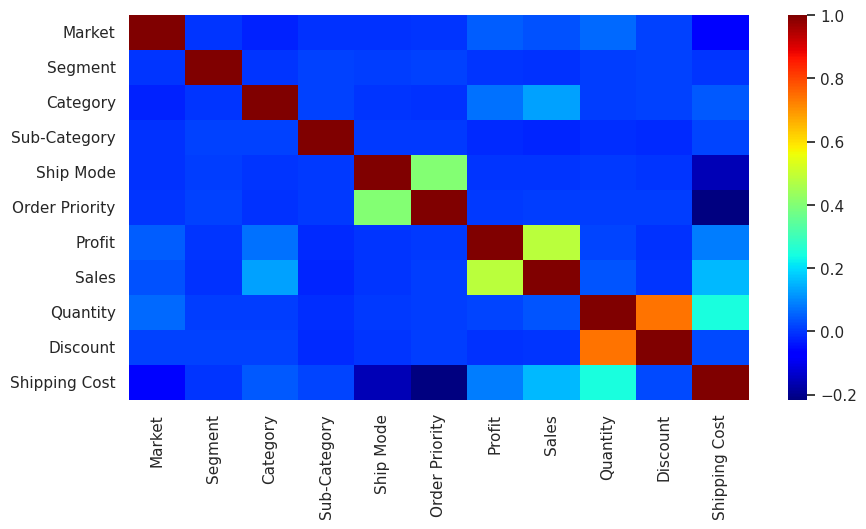

In [ ]:
sns.heatmap(dfa.corr(), cmap='jet')

Por ser variables correlacionadas: Me quedo con Profit, descarto Sales

Me quedo con Shipping Cost, descarto Quantity, Ship Mode, Order Priority

In [ ]:
dfa2=dfa[['Profit','Market','Segment','Category','Sub-Category','Discount','Shipping Cost']]
dfa2.columns = ['Profit','Market','Segment','Category','Sub_Category','Discount','Shipping_Cost']
dfa2

,Profit,Market,Segment,Category,Sub_Category,Discount,Shipping_Cost
0,106.1400,1,0,1,14,0.0,3505
1,36036.0000,0,0,1,15,0.1,972
2,29.6400,3,0,1,14,0.0,817
3,-26055.0000,4,2,1,12,0.5,482
4,37.7700,0,0,0,9,0.1,470
...,...,...,...,...,...,...,...
51285,45188.0000,6,1,1,3,0.2,89
51286,0.4200,1,0,1,3,0.0,49
51287,12.3600,5,0,1,10,0.0,35
51288,0.5600,5,0,1,10,0.0,20


### **v) Entrenamiento y Testeo**

**Primer Modelo Propuesto: Regresión múltiple**


**Ganancia** = x1 * Mercado + x2 * Segmento de Cliente + x3 * Categoría de Producto [texto del vínculo](https://)

In [ ]:
# Separo la variable de análisis del primer modelo
x1 = dfa2[['Market','Segment','Category']]
x1

,Market,Segment,Category
0,1,0,1
1,0,0,1
2,3,0,1
3,4,2,1
4,0,0,0
...,...,...,...
51285,6,1,1
51286,1,0,1
51287,5,0,1
51288,5,0,1


In [ ]:
# Separo la variable de interés
y1=dfa2['Profit']
y1

0          106.1400
1        36036.0000
2           29.6400
3       -26055.0000
4           37.7700
            ...    
51285    45188.0000
51286        0.4200
51287       12.3600
51288        0.5600
51289       -0.6048
Name: Profit, Length: 51290, dtype: float64

In [ ]:
# Creamos los conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [ ]:
[x1_train.size,x1_test.size]

[123096, 30774]

In [ ]:
[y1_train.size,y1_test.size]

[41032, 10258]

In [ ]:
# Entrenando el modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x1_train, y1_train)

LinearRegression()

In [ ]:
#Recuperamos la intersección
print(regressor.intercept_)

-241825.42054825329


In [ ]:
#Los regresores
print(regressor.coef_)

[ 38081.90329116 -11773.26204895 204091.6427246 ]


In [ ]:
#Hacemos nuestras predicciones
y1_pred = regressor.predict(x1_test)
y1_pred

array([142811.34080303, 129129.21453426, -11425.13658144, ...,
       166357.86490094, -51415.90409243, 114593.835341  ])

In [ ]:
[y1_test.shape, y1_pred.shape]

[(10258,), (10258,)]

In [ ]:
Sesgo = y1_pred - y1_test

In [ ]:
error_porc1 = ((y1_pred - y1_test)/y1_pred) *100

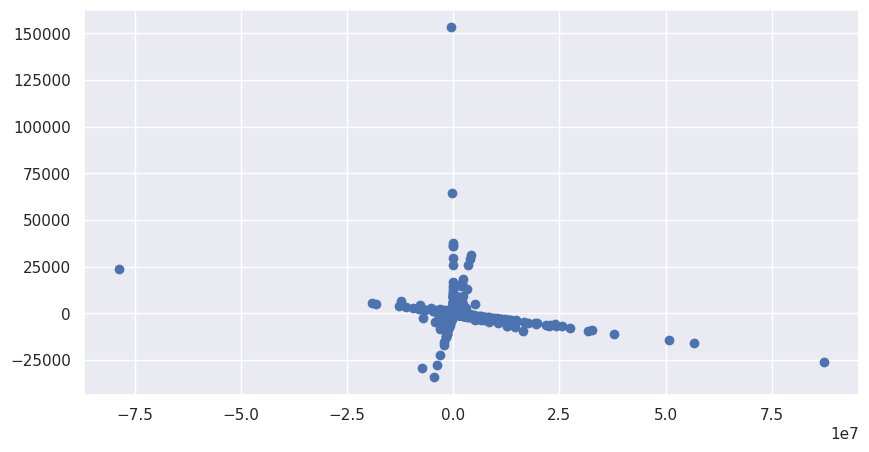

In [ ]:
plt.scatter(y1_test,error_porc1)

In [ ]:
# Validacion simple
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_true= y1_test, y_pred= y1_pred))
print('MAE: ',mean_absolute_error(y_true= y1_test, y_pred= y1_pred))
print('R2: ',r2_score(y_true= y1_test, y_pred= y1_pred))

MSE:  3545025256917.178
MAE:  313202.924942666
R2:  0.008237289036295392


**Segundo Modelo Propuesto: Regresión múltiple**

**Ganancia** = x1 * Mercado + x2 * Segmento de Cliente + x3 * Categoría de Producto + x4 * Descuento + x5 * Costo de Envío

In [ ]:
model_2 = "'Profit'~'Market'+'Segment'+'Category'+'Discount'+'Shipping Cost'"

In [ ]:
# Separo la variable de análisis del primer modelo
x2 = dfa2[['Market','Segment','Category','Discount','Shipping_Cost']]
x2

,Market,Segment,Category,Discount,Shipping_Cost
0,1,0,1,0.0,3505
1,0,0,1,0.1,972
2,3,0,1,0.0,817
3,4,2,1,0.5,482
4,0,0,0,0.1,470
...,...,...,...,...,...
51285,6,1,1,0.2,89
51286,1,0,1,0.0,49
51287,5,0,1,0.0,35
51288,5,0,1,0.0,20


In [ ]:
y2 = dfa2['Profit']
y2

0          106.1400
1        36036.0000
2           29.6400
3       -26055.0000
4           37.7700
            ...    
51285    45188.0000
51286        0.4200
51287       12.3600
51288        0.5600
51289       -0.6048
Name: Profit, Length: 51290, dtype: float64

In [ ]:

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x2_train, y2_train)

LinearRegression()

In [ ]:
#Recuperamos la intersección
print(regressor.intercept_)

-363104.5445050445


In [ ]:
#Los regresores
print(regressor.coef_)

[ 4.23668424e+04 -1.15042395e+04  1.96252388e+05 -8.31049160e+03
  6.25442961e+01]


In [ ]:
#Hacemos nuestras predicciones
y2_pred = regressor.predict(x2_test)
y2_pred

array([163850.96818281,  56498.02831975, -92708.90048004, ...,
        95294.59775919, -78406.2272879 ,  50746.99925262])

In [ ]:
[y2_test.shape, y2_pred.shape]

[(10258,), (10258,)]

In [ ]:
Sesgo = y2_pred - y2_test

In [ ]:
error_porc2 = ((y2_pred - y2_test)/y2_pred) *100

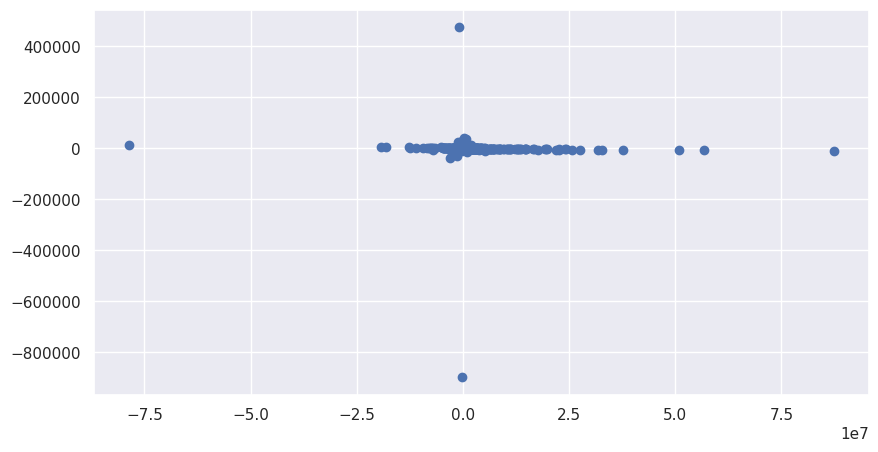

In [ ]:
plt.scatter(y2_test,error_porc2)

In [ ]:
# Validacion simple
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_true= y2_test, y_pred= y2_pred))
print('MAE: ',mean_absolute_error(y_true= y2_test, y_pred= y2_pred))
print('R2: ',r2_score(y_true= y2_test, y_pred= y2_pred))

MSE:  3509612979257.4395
MAE:  322885.10130127874
R2:  0.018144292216228708


**Tercer Modelo Propuesto: Random Forest Regresión**

La ganancia como función de todas las variables

In [ ]:
# separar en X y y
data= dfa.values
X,y = data[:,:-1],data[:, -1]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, shuffle=True)
print(X_train.shape, X_test.shape)

(41032, 10) (10258, 10)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Modelo
model =RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)
# Ajuste
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=42)

In [ ]:
predicciones= model.predict(X_test)

In [ ]:
# Validacion simple
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_true= y_test, y_pred= predicciones))
print('MAE: ',mean_absolute_error(y_true= y_test, y_pred= predicciones))
print('R2: ',r2_score(y_true= y_test, y_pred= predicciones))

MSE:  1733961.002847303
MAE:  819.2039441943215
R2:  0.6851785746884191


De los tres modelos propuestos se ve que el tercero logra explicar casi el 69% de las variaciones en las ganancias, mientras que los anteriores no tenían poder explicativo.

Procedemos a optimizar sus hiperparámetros.

### **vi) Optimización y Selección del modelo Random Forest de Regresión**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [ ]:
y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)

1905428.8721064294

In [ ]:
y_pred = clf.predict(X_test)
mean_squared_error(y_test, y_pred)

1866115.6406113664

In [ ]:
results = pd.DataFrame(zip(y_test, y_pred, y_test - y_pred), columns = ['y_test', 'y_pred', 'error'])
results.head(10)

,y_test,y_pred,error
0,2254.0,2877.106992,-623.106992
1,1905.0,3651.879470,-1746.879470
2,96.0,161.597347,-65.597347
3,515.0,1951.286618,-1436.286618
4,45.0,758.224930,-713.224930
5,926.0,828.610916,97.389084
6,4777.0,3651.879470,1125.120530
7,4308.0,6029.682232,-1721.682232
8,4092.0,2847.235820,1244.764180
9,362.0,485.858134,-123.858134


<Axes: >

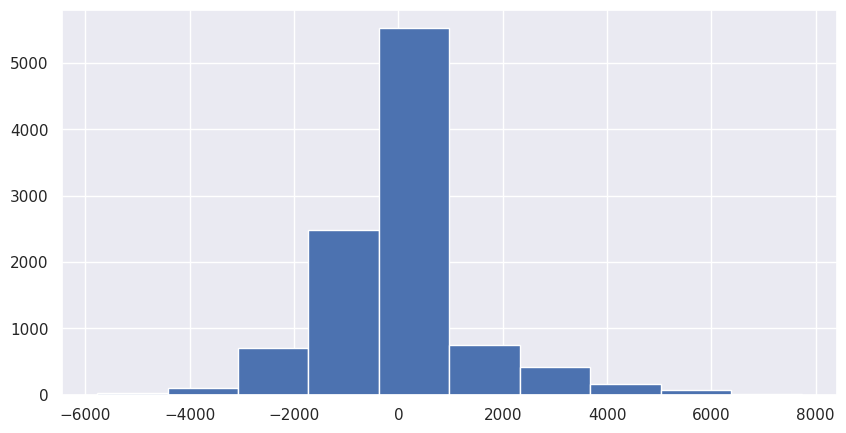

In [ ]:
results['error'].hist()

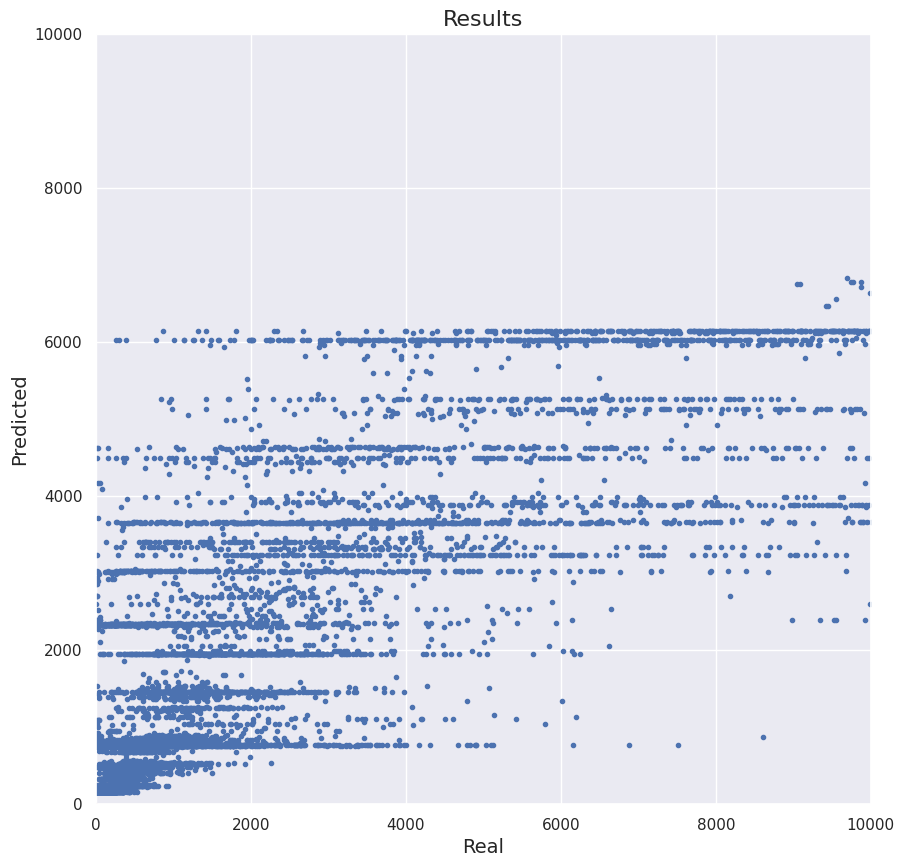

In [ ]:
plt.figure(figsize=(10,10))
x=np.linspace(0,5,5)
plt.plot(results['y_test'], results['y_pred'], 'b.')
plt.plot(x, x, 'r-')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.title("Results", fontsize=16)
plt.xlabel("Real", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.savefig("Results.png")
plt.show()

**A modo de Conclusión**

Se puede ver que el comportamiento de la ganancia se puede describir a partir de las variables seleccionadas en el subset *dfa* como se asumió.

A modo de disparador, un análisis similar puede encararse para definir el comportamiento de:

1.   Segmentos de Clientes
2.   Categoría de Productos

en función de las variables restantes en el *df1*